In [1]:
#importando as libs

import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
#lendo os dados

base_dados = pd.read_csv('CasoUnicornio.csv')

In [3]:
#verificando a dimensão do arquivo

base_dados.shape

(1186, 7)

In [6]:
#Primeiros dados

base_dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [9]:
#colunas

base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [5]:
#Renomeando as colunas

base_dados.rename(columns = {
    
    'Company': 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Investors' : 'Investidores',
    
},inplace = True)

In [62]:
#Obtendo informações

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Empresa         1186 non-null   object        
 1   Valor ($)       1186 non-null   object        
 2   Data de Adesão  1186 non-null   datetime64[ns]
 3   País            1186 non-null   object        
 4   City            1186 non-null   object        
 5   Setor           1186 non-null   object        
 6   Investidores    1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


In [37]:
#Verificando os dados nulos

base_dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
City               0
Setor              0
Investidores      18
dtype: int64

<Axes: title={'center': 'Analisando campos nulos'}>

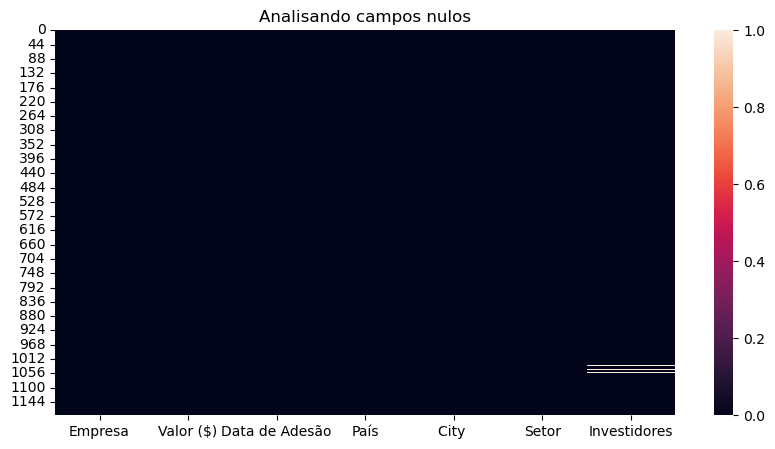

In [48]:
#Analisando os dados nulos com heatmap

plt.figure(figsize = (10,5))
plt.title("Analisando campos nulos")
sbn.heatmap(base_dados.isnull())

In [7]:
#Valores únicos

base_dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
País                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [9]:
#Valore únicos rank

base_dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

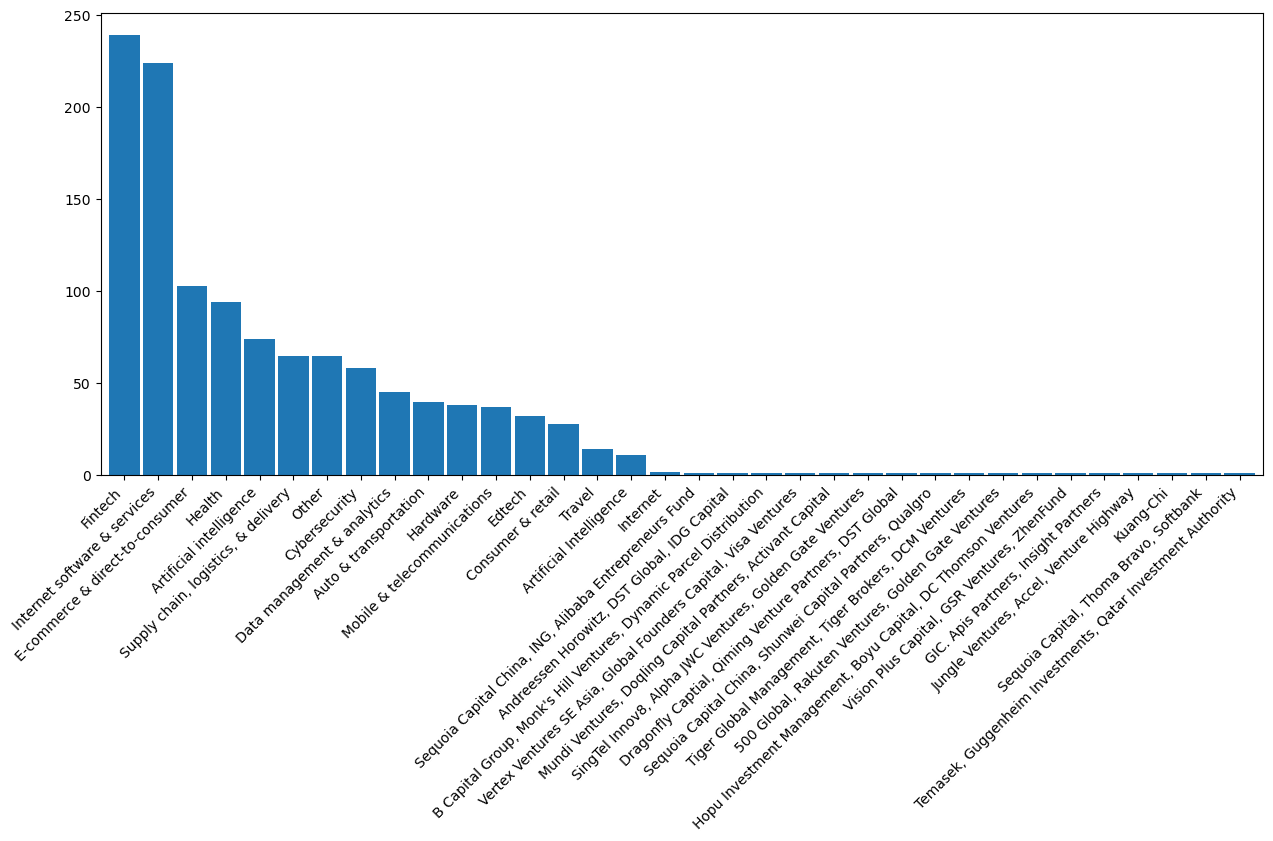

In [22]:
#Mostrando os valores únicos da coluna setor graficamente

plt.figure(figsize=(15, 6))
base_dados['Setor'].value_counts().plot(kind='bar', width=0.9) 
plt.xticks(rotation=45, ha='right')
plt.show()


In [24]:
#Analisando os valores únicos dos países 

base_dados['País'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

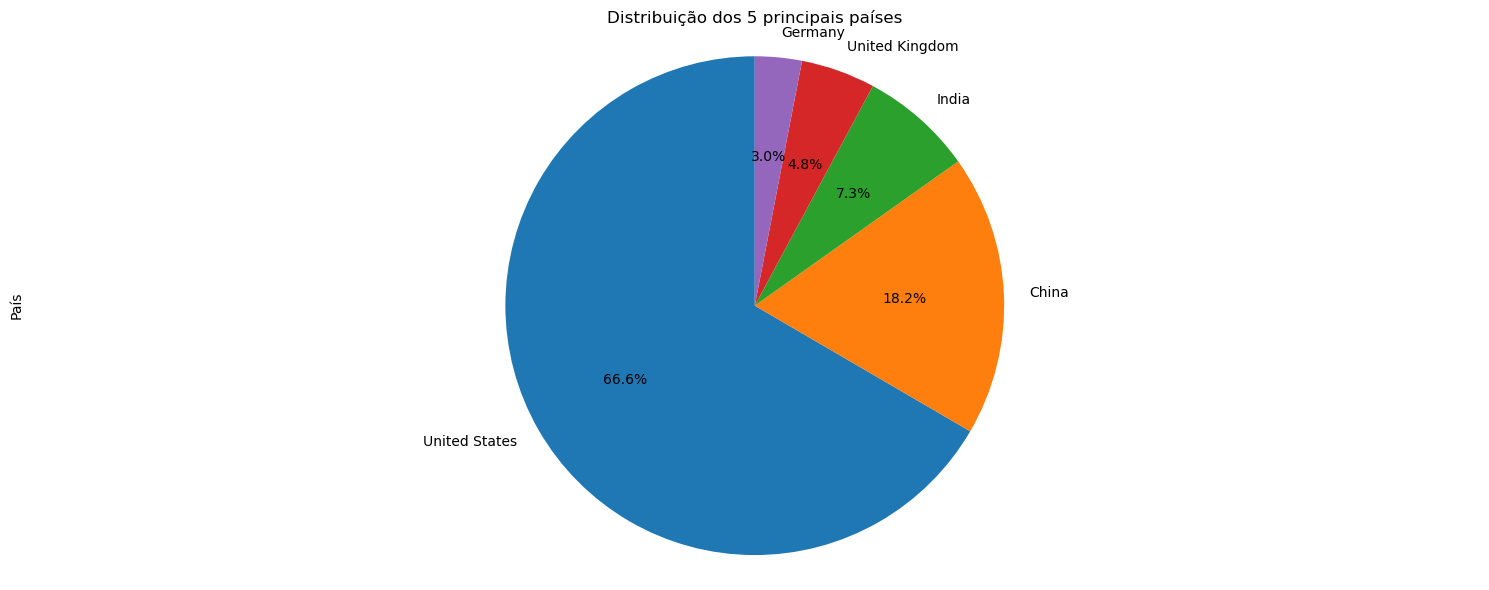

In [39]:
#Analisando graficamente os valores únicos dos primeiros 5 países 
plt.figure(figsize=(15, 6))
counts = base_dados['País'].value_counts().head(5)

# Configurando a distância dos rótulos e criando o gráfico de pizza
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=1.1)

plt.axis('equal')
plt.title('Distribuição dos 5 principais países')  # Adicionando um título
plt.tight_layout()  # Ajustando automaticamente o layout
plt.show()



In [61]:
#Conversão para Data
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])
base_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [65]:
#extraindo ano e mês

base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year

In [93]:
#Tabela Analitica

base_dados.groupby(by= ['País','Ano','Mes']).count()

Empresa  Valor ($)  Data de Adesão  City   Setor  \
País          Ano  Mes                                                     
Argentina     2021 8          1          1               1      1      1   
Australia     2018 1          1          1               1      1      1   
              2019 3          1          1               1      1      1   
              2021 5          1          1               1      1      1   
                   7          2          2               2      2      2   
...                         ...        ...             ...    ...    ...   
United States 2022 6         14         14              14     14     14   
                   7          4          4               4      4      4   
                   8          3          3               3      3      3   
Vietnam       2021 10         1          1               1      1      1   
                   12         1          1               1      1      1   

                        Investidores  
País          Ano  Mes                
Argentina     2021 8               1  
Australia     2018 1               1  
              2019 3               1  
              2021 5               1  
                   7               2  
...                              ...  
United States 2022 6              14  
                   7               4  
                   8               3  
Vietnam       2021 10              1  
                   12              1  

[441 rows x 6 columns]

In [94]:
# Filtrando as linhas onde o país é 'Brazil'
base_dados[base_dados['País'] == 'Brazil']

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores,Mes,Ano
132,QuintoAndar,$5.10,2019-09-09,Brazil,Campinas,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",9,2019
133,C6 Bank,$5.05,2020-12-02,Brazil,Sao Paulo,Fintech,Credit Suisse,12,2020
158,Creditas,$4.80,2020-12-18,Brazil,Sao Paulo,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo...",12,2020
283,Nuvemshop,$3.10,2021-08-17,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel",8,2021
291,Wildlife Studios,$3,2019-12-05,Brazil,Sao Paulo,Other,"Benchmark, Bessemer Venture Partners",12,2019
323,Loft,$2.90,2020-01-03,Brazil,Sao Paulo,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors",1,2020
350,Unico,$2.60,2021-08-03,Brazil,Sao Paulo,Artificial intelligence,"Big Bets, General Atlantic, SOFTBANK Latin Ame...",8,2021
423,CloudWalk,$2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",9,2021
470,Loggi,$2,2019-06-05,Brazil,Sao Paulo,"Supply chain, logistics, & delivery","Qualcomm Ventures, SoftBank Group. Monashees+",6,2019
643,Olist,$1.50,2021-12-15,Brazil,Curitiba,E-commerce & direct-to-consumer,"Redpoint e.ventures, Valor Capital Group, Soft...",12,2021


In [7]:
# Transformando a coluna Valor
base_dados['Valor ($)'] = pd.to_numeric( base_dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

base_dados.head()

,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [9]:
# Tabela Analitica
Analise_Pais = base_dados.groupby(by=['País'])['Valor ($)'].sum(numeric_only=True).reset_index()

Analise_Pais.head()

,País,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [10]:
#análise dos valores agrupados por país

Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

,País,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


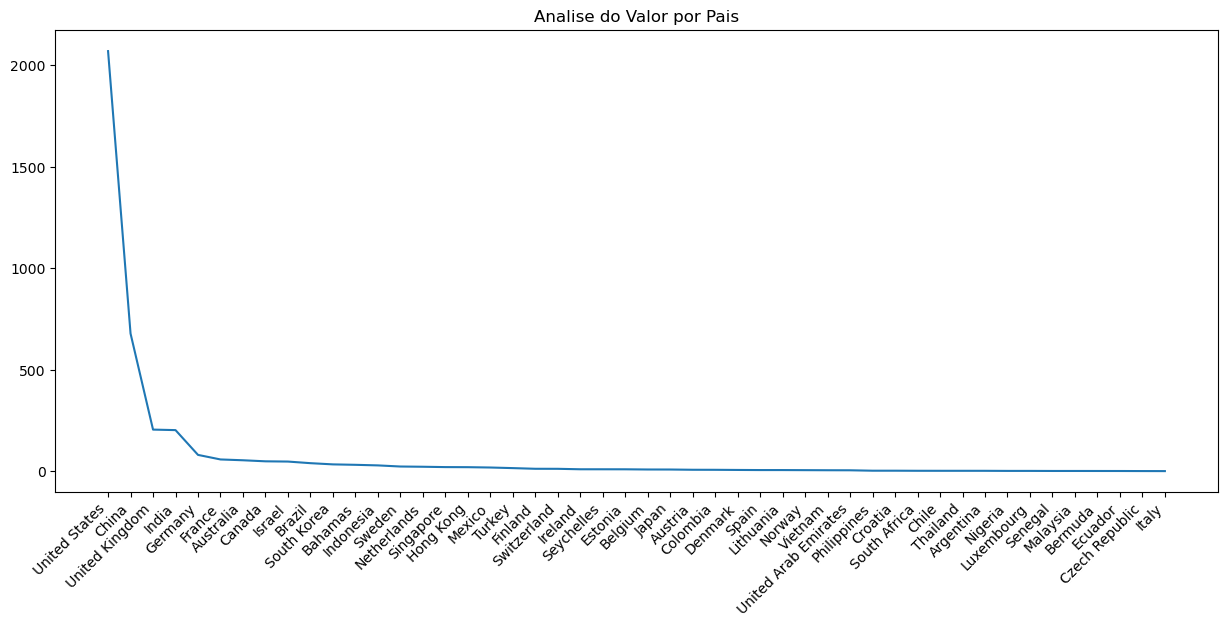

In [12]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['País'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');